#Boolean reduction for 3-body interaction to 2-body

Usually we can only calculate 2-body interaction using QUBO. But sometimes we get equation including 3-body interaction in the equation. The problem solved by using boolean reduction, now we check the way how to reduce the dimension of the equation.

##How to solve 2-body interaction
If we have a cost function like below, we can solve this simply using QUBO. QUBOmatrix has q0 bias value as diagonal element and interaction between q0 and q1 value as off-diagonal element

<img class="math math-inline" src="https://render.githubusercontent.com/render/math?math=E =q_0-q_0q_1&amp;mode=inline">

Let's prepare blueqat to solve the problem.

In [0]:
!pip install -U blueqat

In [0]:
import blueqat.wq as wq
a = wq.Opt()
a.qubo = [[1,-1],[0,0]]
a.sa()

1.5159461498260498


[0, 0]

##How to solve 3-body interaction
Then what if the equation has 3-body interaction. We cannot solve this simply using QUBO

<img class="math math-inline" src="https://render.githubusercontent.com/render/math?math=E%3Dq_0-q_0q_1q_2">

So, we have to break this down to 2-body interaction.

##How to break down
We add an additional qubit and express like below

<img class="math math-inline" src="https://render.githubusercontent.com/render/math?math=q_1q_2%20%3D%20q_3">

And adopting this we need another equation for constraint of qubits.

<img class="math math-inline" src="https://render.githubusercontent.com/render/math?math=E%3Dq_0-q_0q_3%20%2B%20%5Cdelta(3q_3%2Bq_1q_2-2q_1q_3-2q_2q_3)">

Gamma is a hyper parameter and this time we try use 0.5 for gamma

<img class="math matn-inline" src="https://render.githubusercontent.com/render/math?math=E%20%3D%20q_0-q_0q_3%2B1.5q_3%2B0.5q_1q_2-q_1q_3-q_2q_3">

and let's start solve this.

In [0]:
b = wq.Opt()
b.qubo = [[1,0,0,-1],[0,0,0.5,-1],[0,0,0,-1],[0,0,0,1.5]]
b.sa()

1.5440006256103516


[1, 1, 1, 1]

This is solved. you get [1,1,1,1]

<img class="math matn-inline" src="https://render.githubusercontent.com/render/math?math=q_0*q_2%20%3D%201*1%20%3D%201%20%3D%20q_3">

If you want to check the time evolution of cost function, using plot() function, you can easily get with simple command.


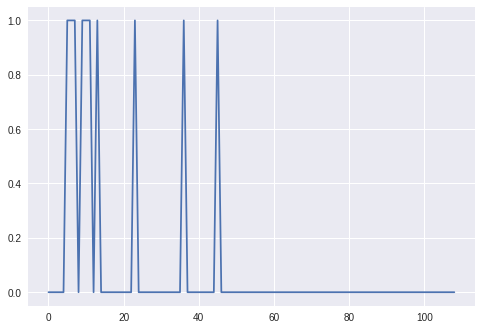

In [0]:
a.plot()